# Titanic - Machine Learning from Disaster

## Imports

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Global config

In [2]:
train_csv = "train.csv"
test_csv = "test.csv"

## Load data

In [3]:
train_data = pd.read_csv(train_csv)
test_data = pd.read_csv(test_csv)
combined_data = [train_data, test_data]

## Data Exploration

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Train data columns

In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Test data columns

In [7]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data dictionary

#### Categorical features

- Survived - Survival - 0 = No, 1 = Yes - **Used for evaluating whether a person survived**
- Sex - Sex 	
- Embarked - Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

#### Ordinal

- Pclass - Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd

#### Numerical features

##### Discrete

- SibSp - # of siblings / spouses aboard the Titanic 	
- Parch - # of parents / children aboard the Titanic 

##### Continuous

- Age - Age in years 		
- Fare - Passenger fare 

#### Mixed/Error-prone/Unused

- PassengerId - Id of person
- Name - Name of Passenger
- Ticket - Ticket number 
- Cabin - Cabin number

### Null values analysis

In [8]:
train_data.info()
print('_'*42)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

In [9]:
null_values_train = train_data.isnull().any(axis=1)
print("Train data rows ratio containing null values: ", 1 - np.count_nonzero(null_values_train) / len(null_values_train))

Train data rows ratio containing null values:  0.20538720538720534


In [10]:
null_values_test = test_data.isnull().any()
print("Test data rows ratio containing null values: ", 1 - np.count_nonzero(null_values_test) / len(null_values_test))

Test data rows ratio containing null values:  0.7272727272727273


**Cabin** feature will be dropped due to the high frequency of missing values.

### Categorical feature distribution

In [11]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Van der hoef, Mr. Wyckoff",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [12]:
test_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Nesson, Mr. Israel",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


Due to the high duplicate ratio in **Ticket** feature, I have decided to drop it from my classifier.

### Numerical feature distribution

In [13]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Pivoting features

In [15]:
train_data[["Pclass", "Survived"]].groupby("Pclass", as_index = False).mean().sort_values(by="Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train_data[["Sex", "Survived"]].groupby("Sex", as_index = False).mean().sort_values(by="Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train_data[["Embarked", "Survived"]].groupby("Embarked", as_index = False).mean().sort_values(by="Survived", ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [18]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Data preparation

Analyze title of people and engineer a new feature

In [20]:
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Combine minority titles

In [21]:
for dataset in combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Attempt to replace missing values for Age, Embarked and Fare using median

In [22]:
age_median = train_data["Age"].median()
train_data["Age"].fillna(age_median, inplace = True)
test_data["Age"].fillna(age_median, inplace = True)

In [23]:
embarked_mode = train_data["Embarked"].mode()
train_data["Embarked"].fillna(embarked_mode, inplace = True)
test_data["Embarked"].fillna(embarked_mode, inplace = True)

In [24]:
fare_median = train_data["Fare"].median()
train_data["Fare"].fillna(fare_median, inplace = True)
test_data["Fare"].fillna(fare_median, inplace = True)

Encode categorical features

In [25]:
mapping = dict()

for i in [4, 11, 12]:
    col_name = train_data.columns[i]
    mapping[col_name] = dict()
    classes = list(set(train_data.iloc[:, i]))
    for j in range(len(classes)):
        mapping[col_name][classes[j]] = j
        
mapping

{'Sex': {'male': 0, 'female': 1},
 'Embarked': {nan: 0, 'C': 1, 'Q': 2, 'S': 3},
 'Title': {'Mr': 0, 'Rare': 1, 'Master': 2, 'Miss': 3, 'Mrs': 4}}

In [26]:
train_data.replace(mapping, inplace = True)
test_data.replace(mapping, inplace = True)

Dropping features as specified above

In [27]:
train_data = train_data.drop(['Ticket', 'Cabin', 'Name'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin', 'Name'], axis=1)

Final result

In [28]:
train_data_mapped = train_data.drop(["PassengerId"], axis=1)
train_data_mapped

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,3,0
1,1,1,1,38.0,1,0,71.2833,1,4
2,1,3,1,26.0,0,0,7.9250,3,3
3,1,1,1,35.0,1,0,53.1000,3,4
4,0,3,0,35.0,0,0,8.0500,3,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,3,1
887,1,1,1,19.0,0,0,30.0000,3,3
888,0,3,1,28.0,1,2,23.4500,3,3
889,1,1,0,26.0,0,0,30.0000,1,0


In [29]:
test_data_mapped = test_data.drop(["PassengerId"], axis=1)
test_data_mapped

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,2,0
1,3,1,47.0,1,0,7.0000,3,4
2,2,0,62.0,0,0,9.6875,2,0
3,3,0,27.0,0,0,8.6625,3,0
4,3,1,22.0,1,1,12.2875,3,4
...,...,...,...,...,...,...,...,...
413,3,0,28.0,0,0,8.0500,3,0
414,1,1,39.0,0,0,108.9000,1,1
415,3,0,38.5,0,0,7.2500,3,0
416,3,0,28.0,0,0,8.0500,3,0


### Correlation analysis

<AxesSubplot:>

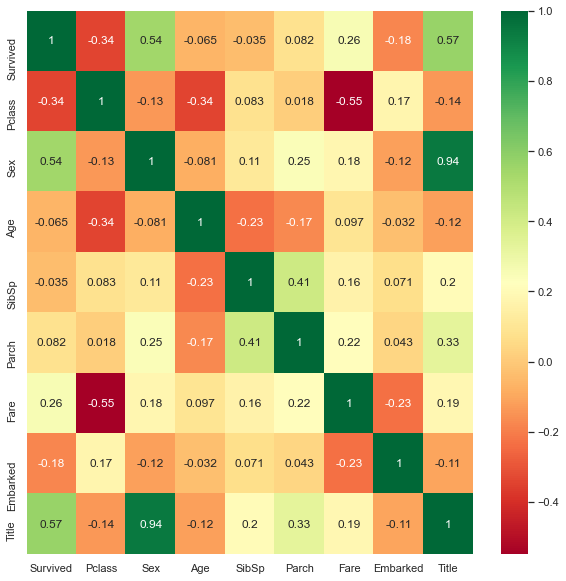

In [30]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(train_data_mapped.corr(), annot=True, cbar=True, cmap="RdYlGn")

Sex, and Fare are highly correlated to Survival as seen above

### Final data preparations

In [31]:
Y_train = train_data_mapped["Survived"]
X_train = train_data_mapped.drop(['Survived'], axis=1)
X_test = test_data_mapped

## Experiments

### Prepare models

In [32]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "SVC" : SVC(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "SGDClassifier": SGDClassifier(),
    "Perceptron": Perceptron(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

### Prepare KFold Validation

In [33]:
def k_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits=5):
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    scores = cross_validate(model, X, y, scoring=scoring_method, cv=cv, n_jobs=-1)
      
    return scores["test_score"]

In [34]:
scoring_method_accuracy = make_scorer(lambda prediction, true_target: accuracy_score(prediction, true_target))

print("10 KFold mean accuracy on untuned parameters:\n")
for name, model in models.items():
    print(name)
    metrics_accuracy = k_fold_fit_and_evaluate(X_train, Y_train, model, scoring_method_accuracy) 
    print("Accuracy_mean:", np.mean(metrics_accuracy))
    print()

10 KFold mean accuracy on untuned parameters:

LogisticRegression
Accuracy_mean: 0.8182160567447117

SVC
Accuracy_mean: 0.6880107965601657

RandomForestClassifier
Accuracy_mean: 0.821542903772519

KNeighborsClassifier
Accuracy_mean: 0.7631975393886135

GaussianNB
Accuracy_mean: 0.7957567007720796

SGDClassifier
Accuracy_mean: 0.651980415542025

Perceptron
Accuracy_mean: 0.6981608185299102

DecisionTreeClassifier
Accuracy_mean: 0.7755570899504111



### Perform hyper parameter tuning

Prepare parameters

In [35]:
random_state = 42
n_splits = 5
scoring_method = make_scorer(lambda true_target, prediction: accuracy_score(true_target, prediction))

model_parameters = {
    "LogisticRegression" : {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
        'C' : [1, 10, 20, 50], 
        'random_state' : [random_state]
    },
    "SVC" : {
        'kernel' : ['linear', 'sigmoid', 'poly'], 
        'C' : [1, 5, 10, 20, 50], 
        'random_state' : [random_state]
    },
    "RandomForestClassifier": {
        'random_state': [random_state],
        'min_samples_leaf' : [1, 2, 10, 50],
        'max_leaf_nodes' : [1, 2, 10, 50, 100],
        'max_depth': [None, 5, 10, 50, 100]
    },
    "KNeighborsClassifier": {
        'n_neighbors' : [3, 5, 8, 13, 20], 
        'weights' : ["distance", 'uniform']
    },
    "GaussianNB": {
    
    },
    "SGDClassifier" : {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
        'random_state' : [random_state]
    },
    "Perceptron" : {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
        'random_state' : [random_state]
    },
    "DecisionTreeClassifier": {
        'random_state': [random_state],
        'min_samples_leaf' : [1, 2, 10, 50],
        'max_leaf_nodes' : [1, 2, 10, 50, 100],
        'max_depth': [None, 5, 10, 50, 100]
    }
}

Perform the tuning

In [36]:
bestHyper = dict()
for model_name, parameters in model_parameters.items():
    model = models[model_name]
    
    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method).fit(X_train, Y_train)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    bestHyper[model_name] = dict()
    
    for k,v in best_params.items():
        bestHyper[model_name][k] = v
        
bestHyper

D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': {'C': 20, 'penalty': 'l2', 'random_state': 42},
 'SVC': {'C': 50, 'kernel': 'linear', 'random_state': 42},
 'RandomForestClassifier': {'max_depth': None,
  'max_leaf_nodes': 50,
  'min_samples_leaf': 1,
  'random_state': 42},
 'KNeighborsClassifier': {'n_neighbors': 3, 'weights': 'uniform'},
 'GaussianNB': {},
 'SGDClassifier': {'penalty': 'none', 'random_state': 42},
 'Perceptron': {'penalty': 'l1', 'random_state': 42},
 'DecisionTreeClassifier': {'max_depth': None,
  'max_leaf_nodes': 50,
  'min_samples_leaf': 1,
  'random_state': 42}}

We have now discovered the best hyper parameters for every algorithm. We now fit our data on them and evaluate their performance

In [37]:
hyperModels = {
    "LogisticRegression" : LogisticRegression(C=bestHyper["LogisticRegression"]["C"], penalty=bestHyper["LogisticRegression"]["penalty"], random_state=42),
    "SVC" : SVC(kernel = bestHyper["SVC"]["kernel"], C=bestHyper["SVC"]["C"], random_state=42),
    "RandomForestClassifier" : RandomForestClassifier(max_depth=bestHyper["RandomForestClassifier"]["max_depth"], min_samples_leaf=bestHyper["RandomForestClassifier"]["min_samples_leaf"], max_leaf_nodes=bestHyper["RandomForestClassifier"]["max_leaf_nodes"], random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "SGDClassifier": SGDClassifier(penalty=bestHyper["SGDClassifier"]["penalty"], random_state=42),
    "Perceptron": Perceptron(penalty=bestHyper["Perceptron"]["penalty"], random_state=42),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=bestHyper["DecisionTreeClassifier"]["max_depth"], min_samples_leaf=bestHyper["DecisionTreeClassifier"]["min_samples_leaf"], max_leaf_nodes=bestHyper["DecisionTreeClassifier"]["max_leaf_nodes"], random_state=random_state)
}


for item in hyperModels:
    hyperModels[item].fit(X_train, Y_train)

for name, model in hyperModels.items():
    metrics_accuracy = k_fold_fit_and_evaluate(X_train, Y_train, model, scoring_method_accuracy)
    print("Accuracy_mean of", name, ": ", np.mean(metrics_accuracy))

D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy_mean of LogisticRegression :  0.8204569706860838
Accuracy_mean of SVC :  0.8204506936162199
Accuracy_mean of RandomForestClassifier :  0.8372606867114432
Accuracy_mean of KNeighborsClassifier :  0.7631975393886135
Accuracy_mean of GaussianNB :  0.7957567007720796
Accuracy_mean of SGDClassifier :  0.7665494946958759
Accuracy_mean of Perceptron :  0.7564685204946331
Accuracy_mean of DecisionTreeClassifier :  0.8327788588286987


RandomForestClassifier shows the best accuracy

## Predict data

Perform the prediction and save to file

In [38]:
result = classifier = hyperModels["RandomForestClassifier"].predict(X_test)

In [39]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': result})
output.to_csv('submission.csv', index=False)

Kaggle accuracy achieved: 0.77751